In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("/content/Dataset .csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [71]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [72]:
df.duplicated().sum()

0

In [73]:
df.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [74]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

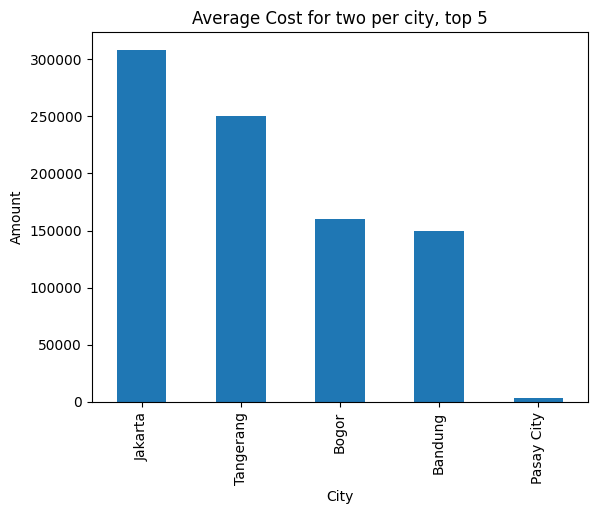

In [75]:
#Group by city and calculate average cost
df.groupby("City") ["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average Cost for two per city, top 5")
plt.xlabel("City")
plt.ylabel("Amount")
# plt.grid()
plt.show()

In [76]:
#Cuisins total number of votes
data = df.groupby("Cuisines") ["Votes"].sum().reset_index()

In [77]:
data[data["Votes"] !=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


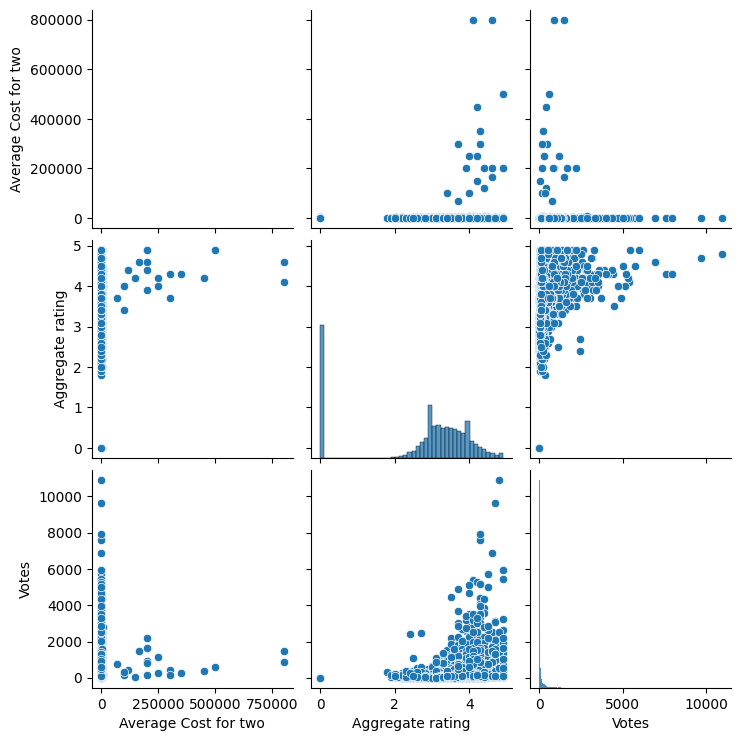

In [78]:
sns.pairplot(df[["Average Cost for two", "Aggregate rating", "Votes"]])

In [79]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

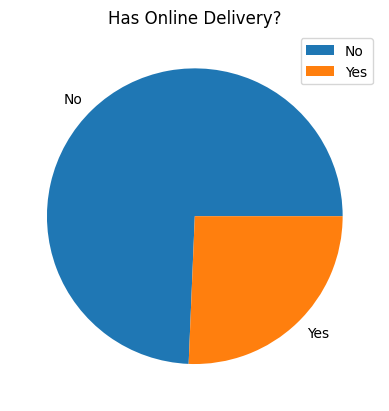

In [80]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has Online Delivery?")
plt.ylabel("")
plt.legend()
plt.show()

In [81]:
df[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating", ascending=True).head(2400)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
8121,2.5,Average
6413,2.5,Average
6541,2.5,Average
7307,2.5,Average


In [82]:
df = df[df["Rating text"]!= "Not rated"]

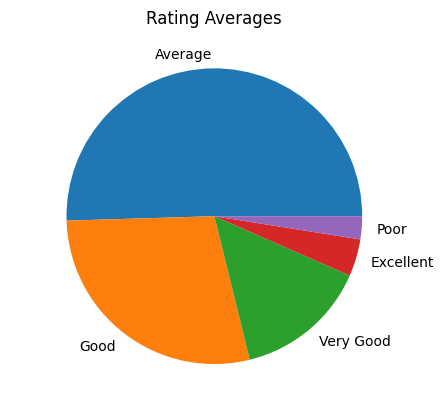

In [83]:
df["Rating text"].value_counts().plot(kind="pie")
plt.title("Rating Averages")
plt.ylabel(" ")
plt.show()

FEATURE ENGINEERING

In [84]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [85]:
X = df[['Average Cost for two', 'Has Table booking', "Has Online delivery", "Price range"]]

#Above  2 below 2.5 Poor
#Above 2.5 below 3.5 Average
#Above 3.5 and below 4.0 Good
#Above 4 and Below 4.5 Very Good
#Above 4.5 Excellent

In [86]:
Y = df[["Aggregate rating"]]


In [87]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [88]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [89]:
X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])

<ipython-input-89-82eade28ac03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])


In [90]:
X


,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [91]:
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])

<ipython-input-91-5f241193ba93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])


In [92]:
X


,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [93]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [94]:
#Has table booking 0 is no 1 is yes
#Has online delivery 0 is no 1 is yes

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
X = scaler.fit_transform(X)

In [97]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [101]:
def modelresults(predictions):
  print ("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
  print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
predictionsfromlr = lr.predict(X_test)

In [105]:
modelresults(predictionsfromlr)

Mean absolute error on model is 0.3911572756861838
Root mean squared error on model is 0.5000765555816451


In [106]:
predictionsfromlr

array([[3.79948691],
       [3.59865098],
       [3.59795986],
       ...,
       [3.59837453],
       [3.27192101],
       [3.59851276]])

In [107]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [108]:
svrmodel = SVR()

In [111]:
param_gridsvr = {"C": [0.1,0.5], "kernel": ["linear", "poly"], "degree" :[2]}

In [113]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [116]:
predsgridsvr = gridsvr.predict(X_test)

In [117]:
modelresults(predsgridsvr)

Mean absolute error on model is 0.3872046943148903
Root mean squared error on model is 0.5019432935901625


In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
param_grid = {
    "max_depth" : [10,30],
    "min_samples_leaf": [1,2],
    "min_samples_split":[2,5]
}

In [123]:
treemodel = DecisionTreeRegressor()

In [124]:
grid_tree = GridSearchCV(estimator = treemodel, param_grid = param_grid)

In [125]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [127]:
grid_tree.predict(X_test)

array([3.93529412, 3.61925926, 3.46818182, ..., 3.47142857, 3.50588235,
       3.61925926])

In [128]:
treepredictions = grid_tree.predict(X_test)

In [130]:
modelresults(treepredictions)

Mean absolute error on model is 0.3554508202691754
Root mean squared error on model is 0.4561670668346558


In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
rfrmodel = RandomForestRegressor()

In [136]:
param_gridrfr = {"max_depth" : [5,15], "n_estimators" : [2,5,10]}

In [137]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [138]:
gridrfr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [139]:
randomforestpredictions = gridrfr.predict(X_test)

In [140]:
modelresults(randomforestpredictions)

Mean absolute error on model is 0.354070996240191
Root mean squared error on model is 0.45578995565808655


In [141]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [145]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [159]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {"n_neighbors" : [17,18,19,20,24]}
knn_grid_search = GridSearchCV (knn, knn_param_grid)

In [160]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [17, 18, 19, 20, 24]})

In [161]:
knnpreds = knn_grid_search.predict(X_test)

In [162]:
modelresults(knnpreds)

Mean absolute error on model is 0.3641120864280891
Root mean squared error on model is 0.4661443604142846


In [163]:
knn_grid_search.best_params_

{'n_neighbors': 24}

In [164]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {"n_estimators" : [50,100,200],
                  "learning_rate": [0.1,0.5,1]}
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [165]:
ada_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [166]:
adapreds = ada_grid_search.predict(X_test)

In [167]:
modelresults(adapreds)

Mean absolute error on model is 0.3653344226485596
Root mean squared error on model is 0.46385977543818635


In [168]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [169]:
import joblib

In [170]:
joblib.dump(gridrfr, "mlmodel.pkl")

['mlmodel.pkl']

In [171]:
scaler

StandardScaler()

In [172]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']